# Project 1 for LING413 
##### Graph Creation

Imports:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import re

Get data from files:

In [2]:
files = ["unigram_tripadvisor.csv", "bigram_tripadvisor.csv", "trigram_tripadvisor.csv"]
country_counts = [{}, {}, {}]

for i, file in enumerate(files):
    df = pd.read_csv(file, sep = ",")
    for j in df["country"]:
        country_counts[i][j] = 1 + country_counts[i].get(j, 0)
    del df

Creating Graphs:

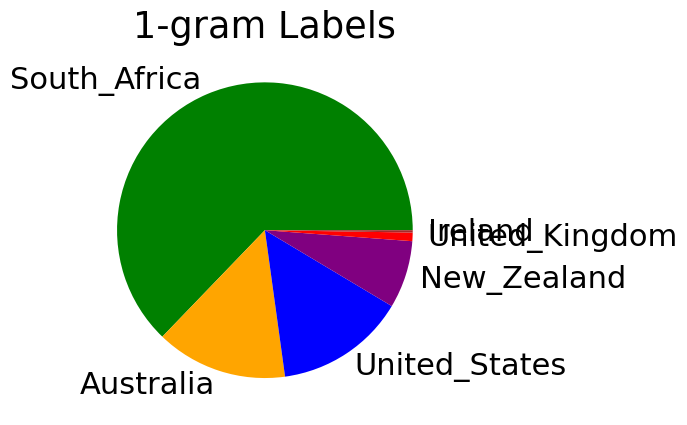

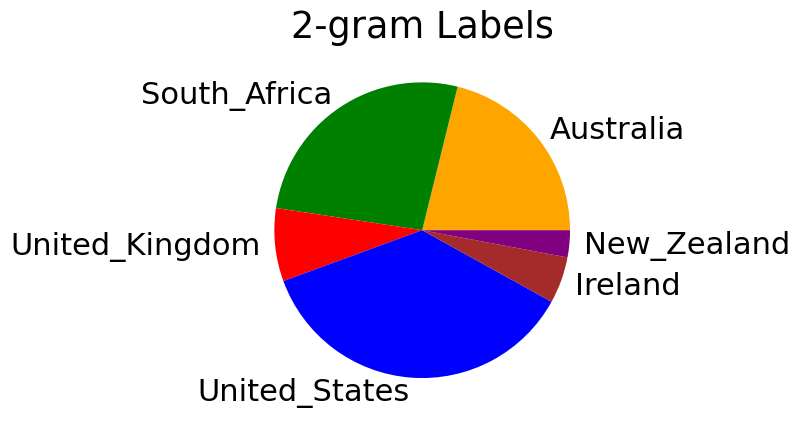

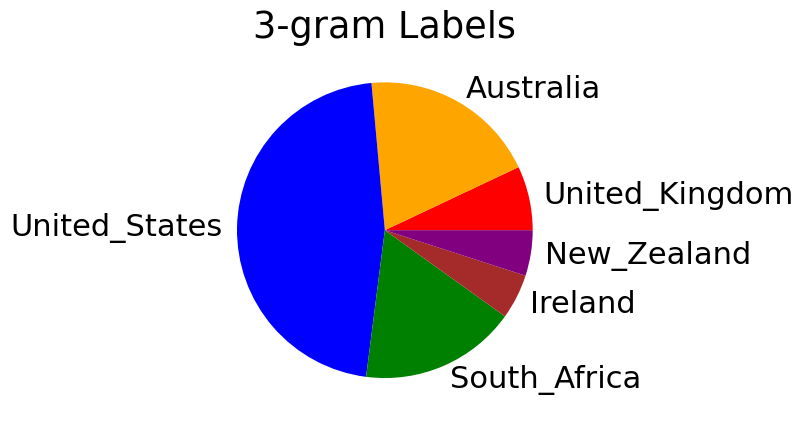

In [3]:

color_map = {
    'Ireland': 'brown',
    'New_Zealand': 'purple',
    'South_Africa': 'green',
    'United_Kingdom': 'red',
    'United_States': 'blue',
    'Australia': 'orange',
}

plt.rcParams.update({'font.size': 22})
for ngram, count in enumerate(country_counts):
    colors = [color_map[key] for key in count.keys()]  # Map keys to colors
    plt.pie(count.values(), labels=count.keys(), colors=colors)
    plt.title(str(ngram + 1) + '-gram Labels')
    plt.show()

Open Files and Extract Data for Accuracy Graph:

In [4]:
files = ["unigram_tweet_classification_results.txt", "bigram_tweet_classification_results.txt", "trigram_tweet_classification_results.txt"]
content = []

for i, file in enumerate(files):
    with open(file, "r") as f:
        lines = [line.strip() for line in f if line.strip()]

        country_f_scores = {}
        for line in lines[1:]:
            match = re.search(r"(\S+)\s+([\d.]+)", line)
            if match:
                country_f_scores[match.group(1)] = float(match.group(2))

        content.append(country_f_scores)

print(content)

[{'Australia': 0.88, 'Ireland': 0.91, 'New_Zealand': 0.86, 'South_Africa': 0.95, 'United_Kingdom': 0.88, 'United_States': 0.92, 'accuracy': 0.9, 'avg': 0.9}, {'Australia': 0.65, 'Ireland': 0.74, 'New_Zealand': 0.66, 'South_Africa': 0.82, 'United_Kingdom': 0.68, 'United_States': 0.75, 'accuracy': 0.72, 'avg': 0.72}, {'Australia': 0.45, 'Ireland': 0.53, 'New_Zealand': 0.47, 'South_Africa': 0.65, 'United_Kingdom': 0.47, 'United_States': 0.51, 'accuracy': 0.52, 'avg': 0.52}]


Create Graphs for Model Accuracy

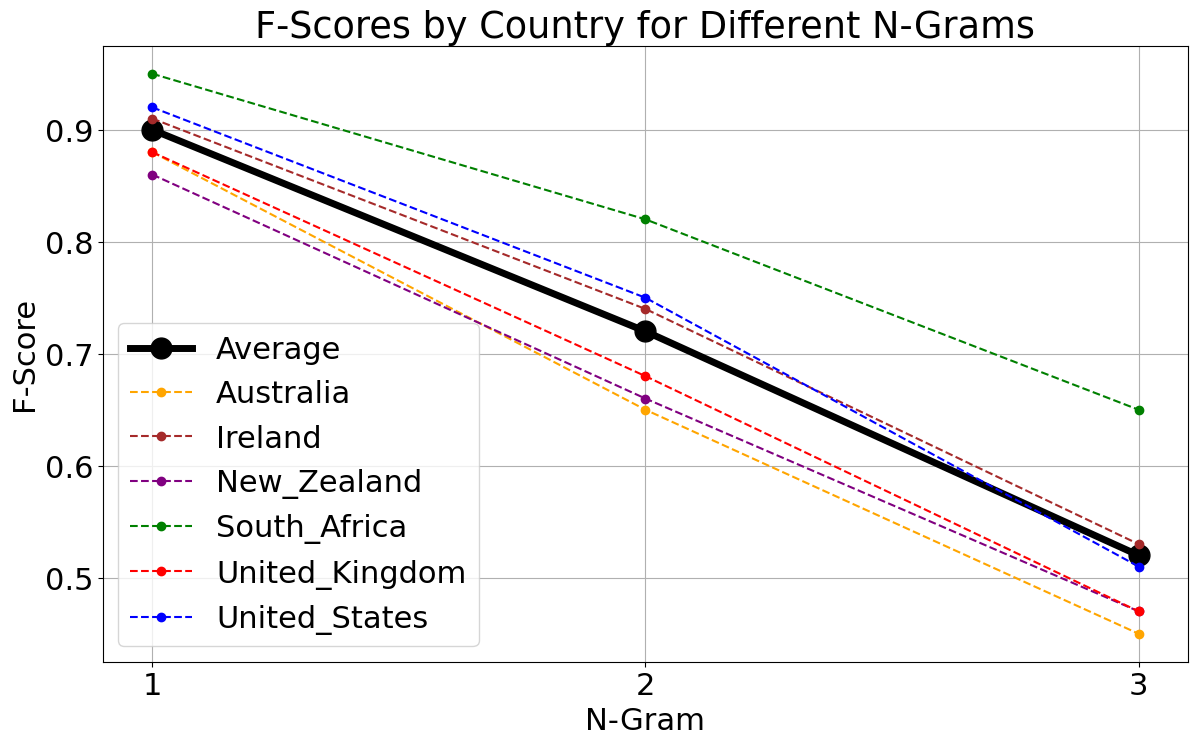

In [5]:
countries = list(content[0].keys())[:-2]  # Exclude 'accuracy' and 'avg'
values = [[item[country] for item in content] for country in countries]

# Extract average values
avg_values = [item['avg'] for item in content]

# Create line plots
plt.figure(figsize=(14, 8))
plt.plot([0, 1, 2], avg_values, label='Average', marker='o', markersize=15, color='black', linewidth=5, linestyle='-')
for i, country in enumerate(countries):
    plt.plot([0, 1, 2], values[i], label=country, marker='o', color=color_map[country], linestyle='--')

plt.xlabel("N-Gram")
plt.ylabel("F-Score")
plt.title("F-Scores by Country for Different N-Grams")
plt.xticks([])
plt.xticks(range(len(values[0])), range(1, len(values[0]) + 1))
plt.legend()
plt.grid(True)

# Show plot
plt.show()